In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
def sep( n: int = 80, sep: str = "="):
    print(sep*n)

def new_section(string: str, n: int = 80, sep: str = "="):
    m = len(string)
    if n < m:
        n = m + 6
    padding = (n-m+1)//2
    print(sep*padding + " " + string + " " + sep*padding)


In [29]:
coffee_quality = pd.read_csv("Dataset/merged_data_cleaned_var.csv")

In [4]:
new_section("Coffee Quality Data")
print(coffee_quality.head())
sep()

=============================== Coffee Quality Data ===============================
   Species                     Owner Country.of.Origin  \
0  Arabica                 metad plc          Ethiopia   
1  Arabica                 metad plc          Ethiopia   
2  Arabica  grounds for health admin         Guatemala   
3  Arabica       yidnekachew dabessa          Ethiopia   
4  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude        Region  ...  \
0      m

In [5]:
new_section("Coffee Quality Data Columns")
print("Número de colunas: ", coffee_quality.shape[0])
print("Número de linhas: ", coffee_quality.shape[1])
print(coffee_quality.columns)
sep()

=========================== Coffee Quality Data Columns ===========================
Número de colunas:  1339
Número de linhas:  43
Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


In [28]:
colunas = ['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']
# Lista de elementos a serem removidos
colunas_para_remover = ['Species', 'Variety', 'Processing.Method', 'Total.Cup.Points', 'Moisture', 'Color']
# Remover elementos
for coluna in colunas_para_remover:
    if coluna in colunas:
        colunas.remove(coluna)

# Exibir lista resultante
print(colunas)


['Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects', 'Expiration', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']


In [6]:
new_section("Coffee Quality Data Total.Cup.Points and Description")
balance_stats = coffee_quality['Total.Cup.Points'].describe()
print(balance_stats)
sep()

============== Coffee Quality Data Total.Cup.Points and Description ==============
count    1339.000000
mean       82.089851
std         3.500575
min         0.000000
25%        81.080000
50%        82.500000
75%        83.670000
max        90.580000
Name: Total.Cup.Points, dtype: float64


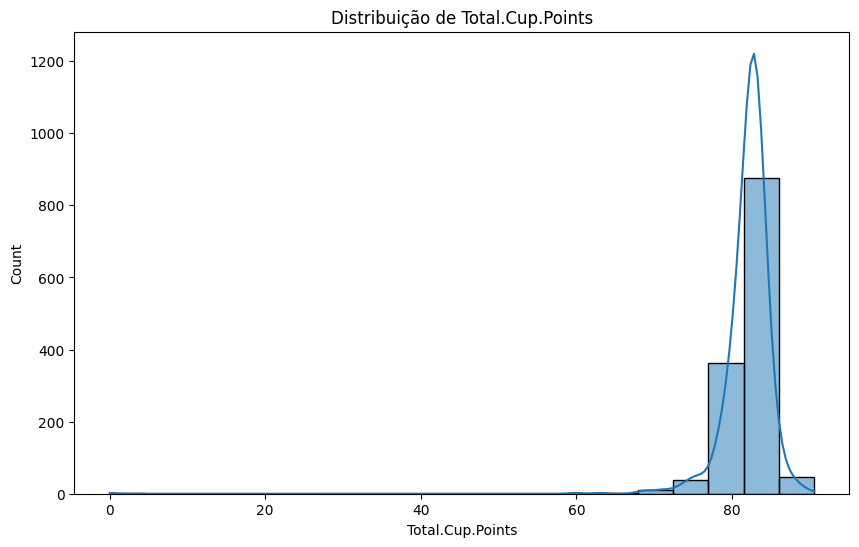

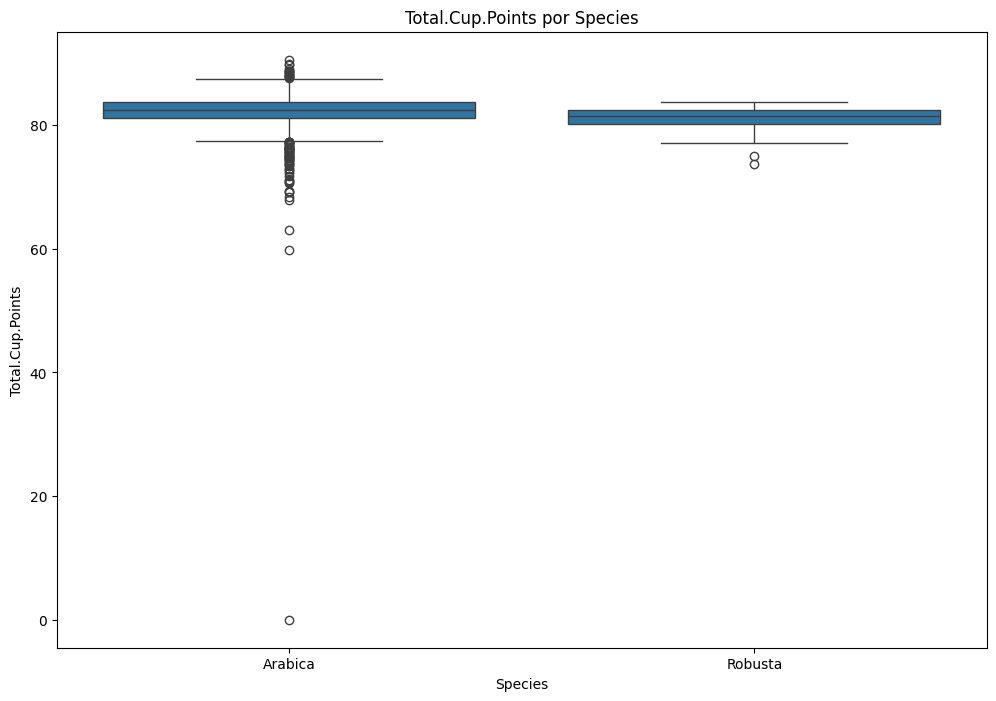

In [7]:
# Histograma de Total.Cup.Points
plt.figure(figsize=(10, 6))
sns.histplot(coffee_quality['Total.Cup.Points'], bins=20, kde=True)
plt.title('Distribuição de Total.Cup.Points')
plt.show()

# Boxplots para Total.Cup.Points por Species
plt.figure(figsize=(12, 8))
sns.boxplot(x='Species', y='Total.Cup.Points', data=coffee_quality)
plt.title('Total.Cup.Points por Species')
plt.show()

                  Total.Cup.Points  Moisture
Total.Cup.Points          1.000000 -0.117722
Moisture                 -0.117722  1.000000


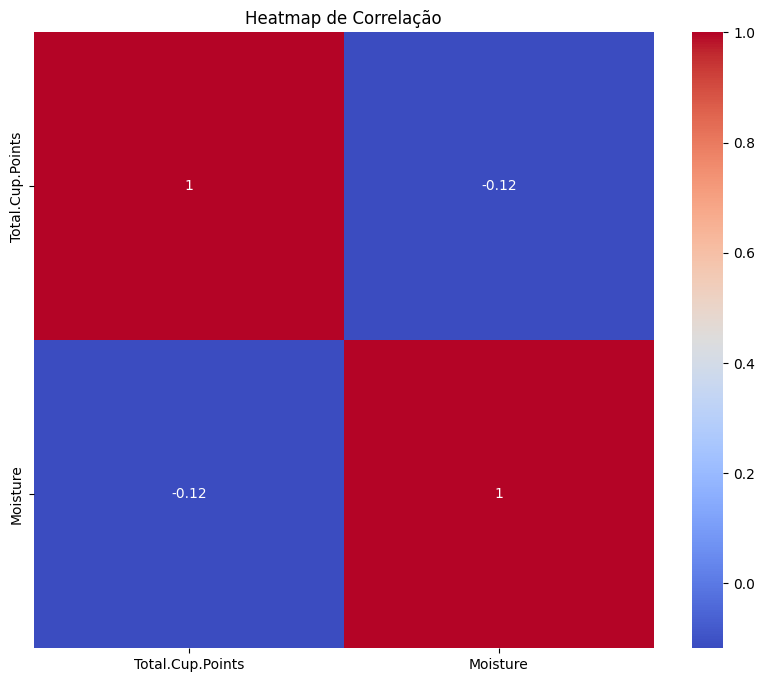

In [8]:
correlation = coffee_quality[['Total.Cup.Points', 'Moisture']].corr()
print(correlation)

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(coffee_quality[['Total.Cup.Points', 'Moisture']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

In [9]:
from scipy.stats import f_oneway

# ANOVA para Total.Cup.Points por Species
anova_result = f_oneway(*[coffee_quality[coffee_quality['Species'] == species]['Total.Cup.Points'] for species in coffee_quality['Species'].unique()])
print(f'ANOVA result for Species: {anova_result}')

ANOVA result for Species: F_onewayResult(statistic=3.4852894566726436, pvalue=0.062135259197709354)


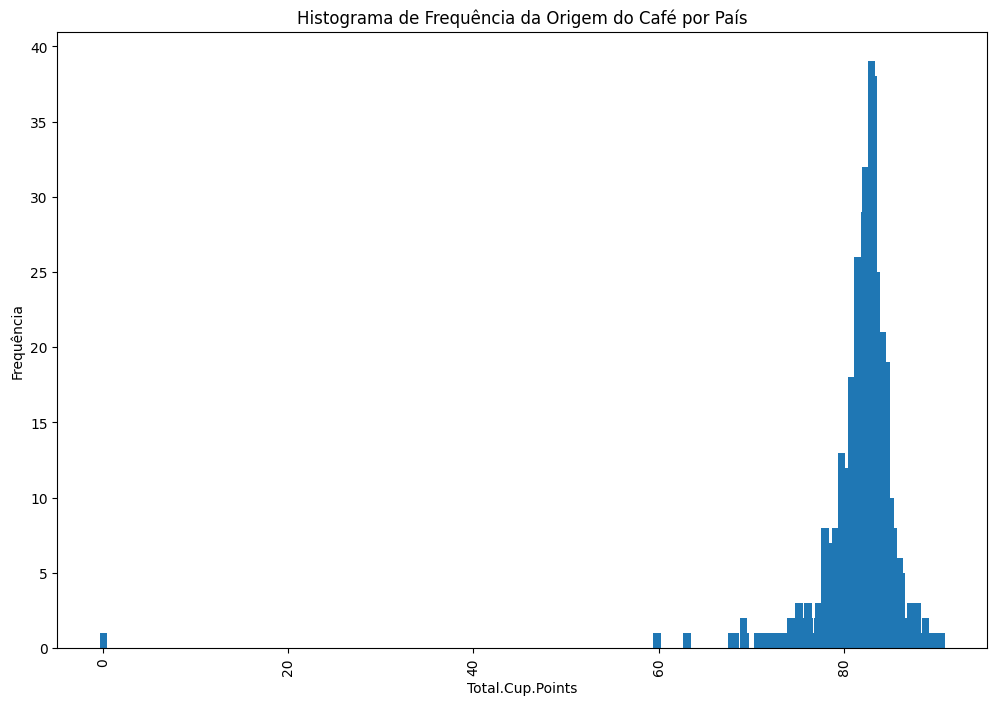

In [10]:
country_counts = coffee_quality["Total.Cup.Points"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Total.Cup.Points") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show() 

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1695794720.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality["Total.Cup.Points"], shade=True)  # shade=True preenche a área sob a curva


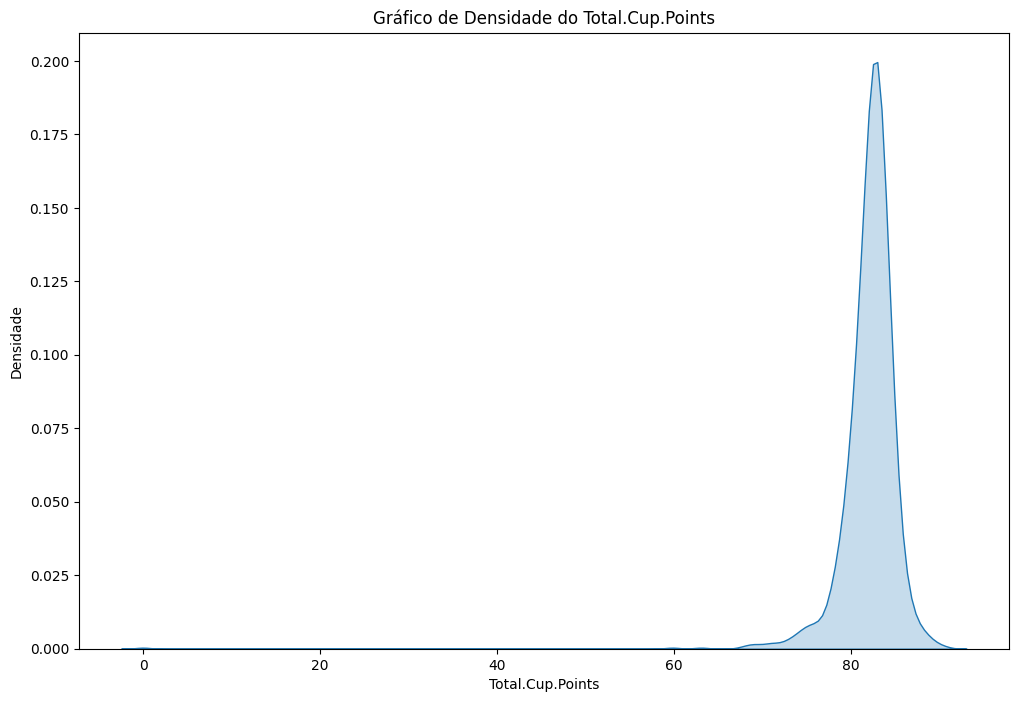

In [11]:
plt.figure(figsize=(12, 8))  
sns.kdeplot(coffee_quality["Total.Cup.Points"], shade=True)  # shade=True preenche a área sob a curva
plt.xlabel("Total.Cup.Points") 
plt.ylabel("Densidade") 
plt.title("Gráfico de Densidade do Total.Cup.Points")  
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\2867565619.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=specie, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\2867565619.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=specie, shade=True)


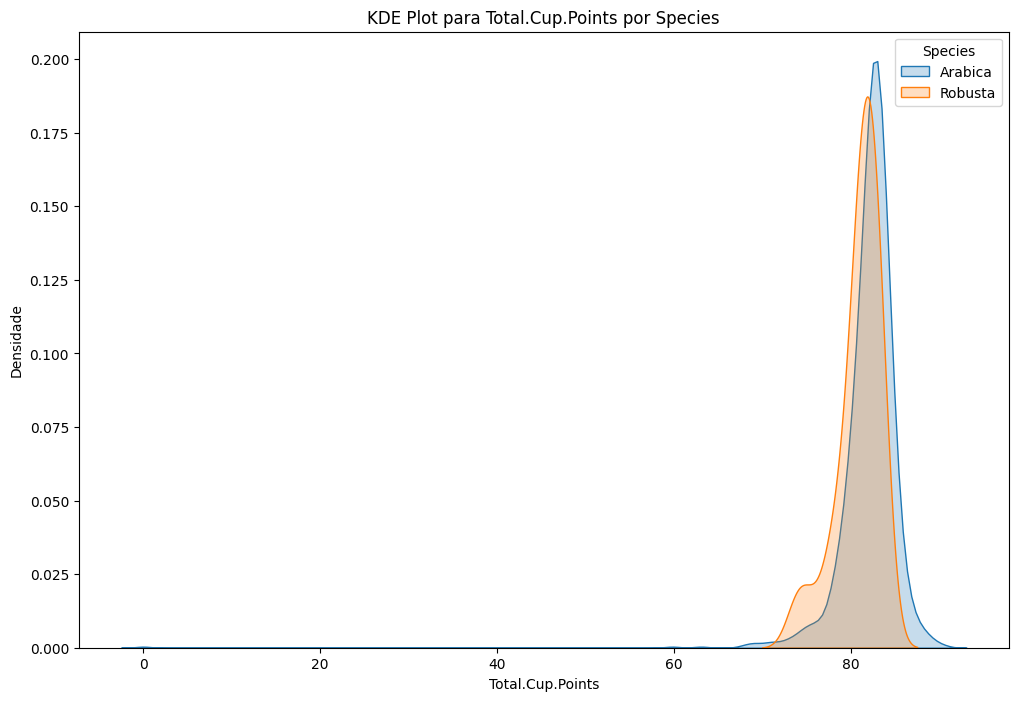

In [12]:
plt.figure(figsize=(12, 8))
for specie in coffee_quality['Species'].unique():
    subset = coffee_quality[coffee_quality['Species'] == specie]
    sns.kdeplot(subset['Total.Cup.Points'], label=specie, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Species')
plt.legend(title='Species')
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\198265406.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\198265406.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])


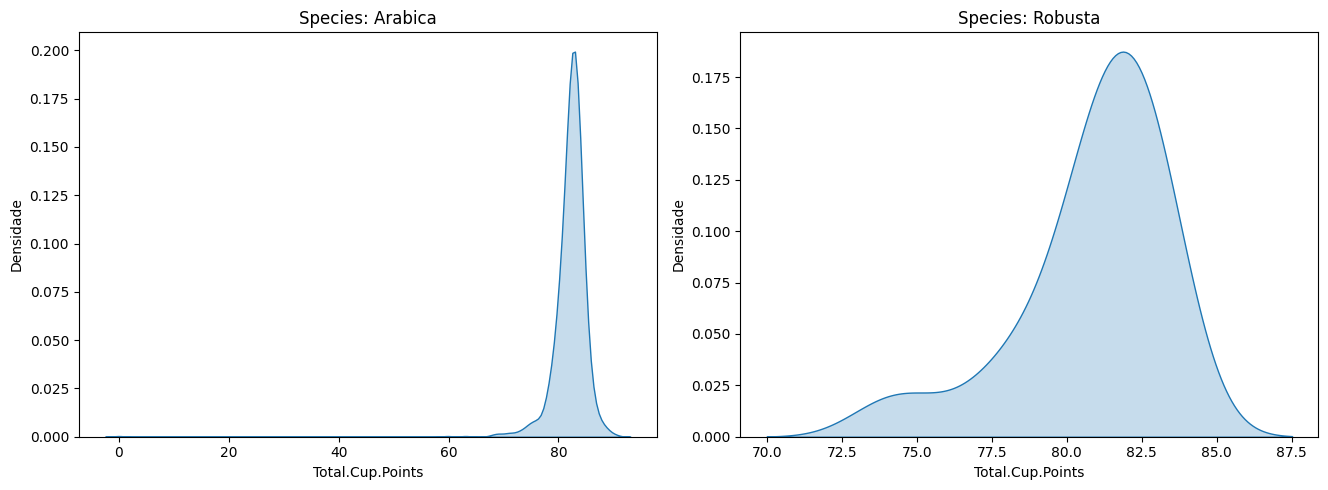

In [13]:
species_list = coffee_quality['Species'].unique()
num_species = len(species_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_species + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, specie in enumerate(species_list):
    subset = coffee_quality[coffee_quality['Species'] == specie]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Species: {specie}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1065880871.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

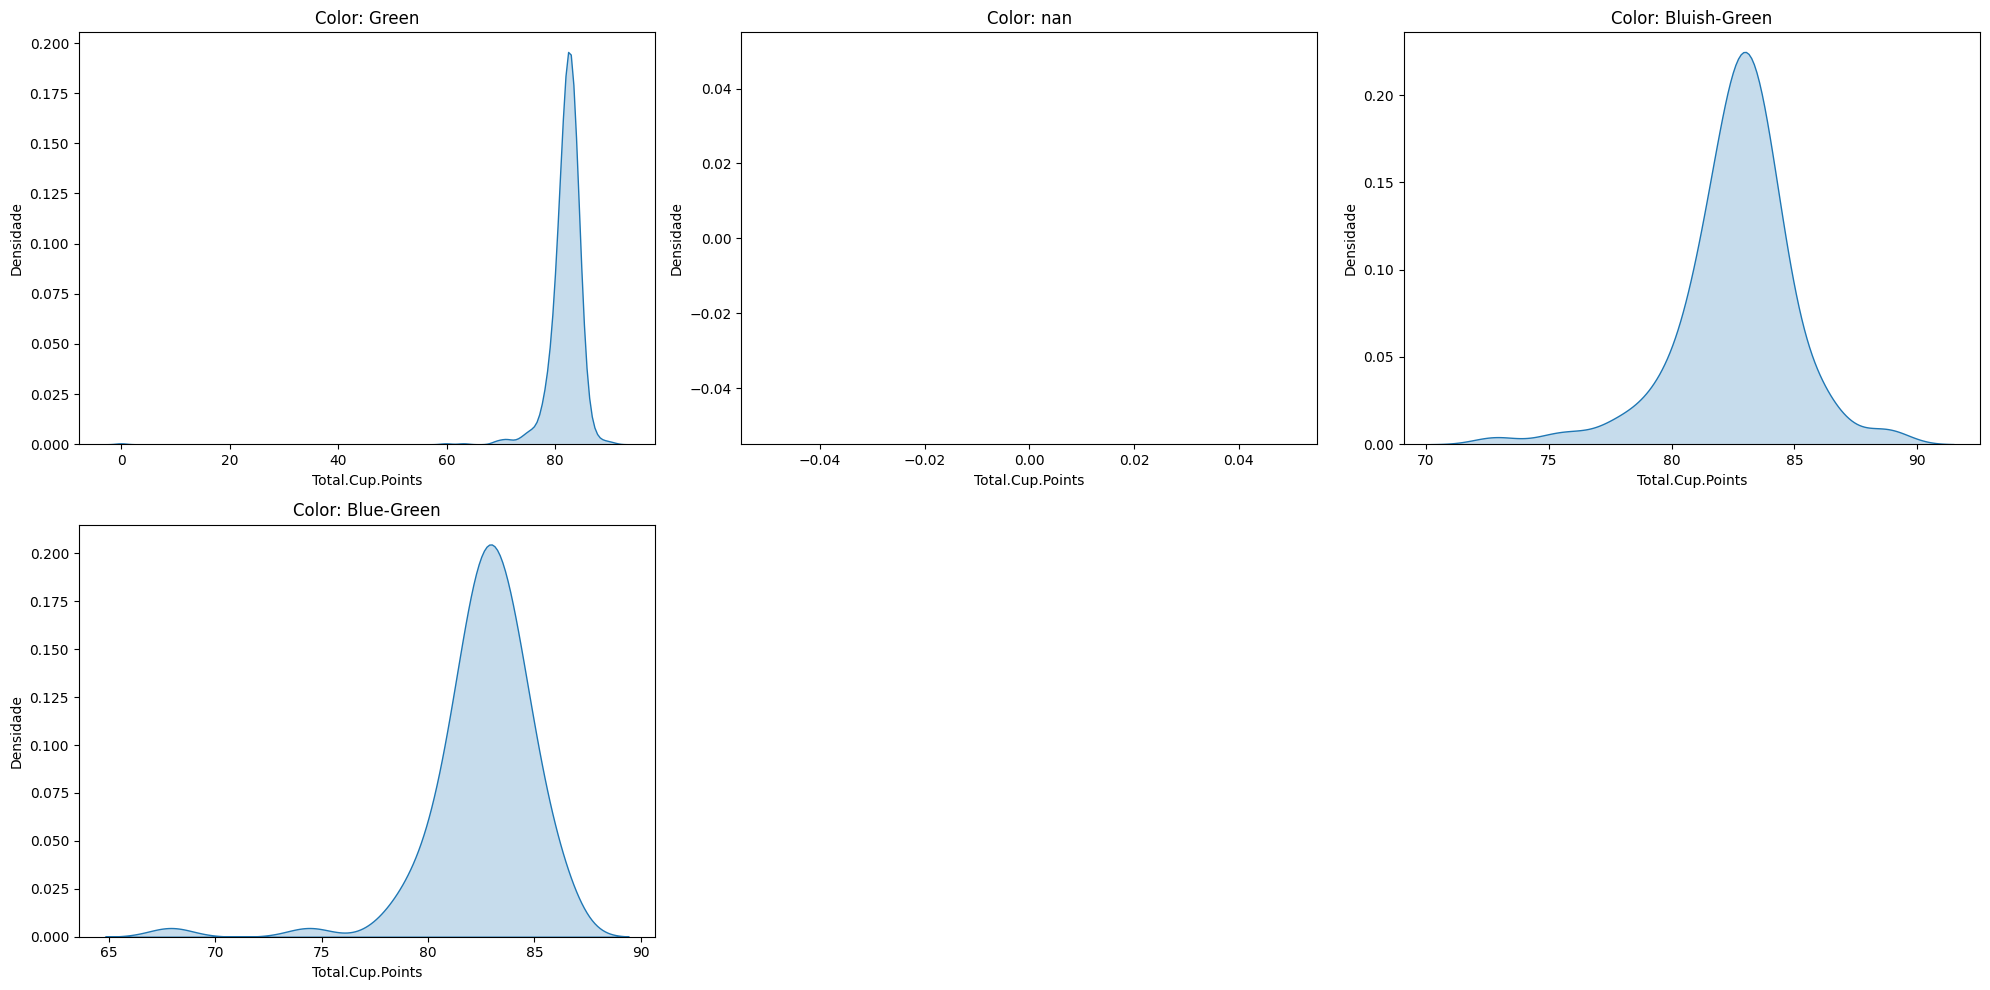

In [14]:

color_list = coffee_quality['Color'].unique()
num_colors = len(color_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_colors + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, color in enumerate(color_list):
    subset = coffee_quality[coffee_quality['Color'] == color]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Color: {color}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1549938527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; 

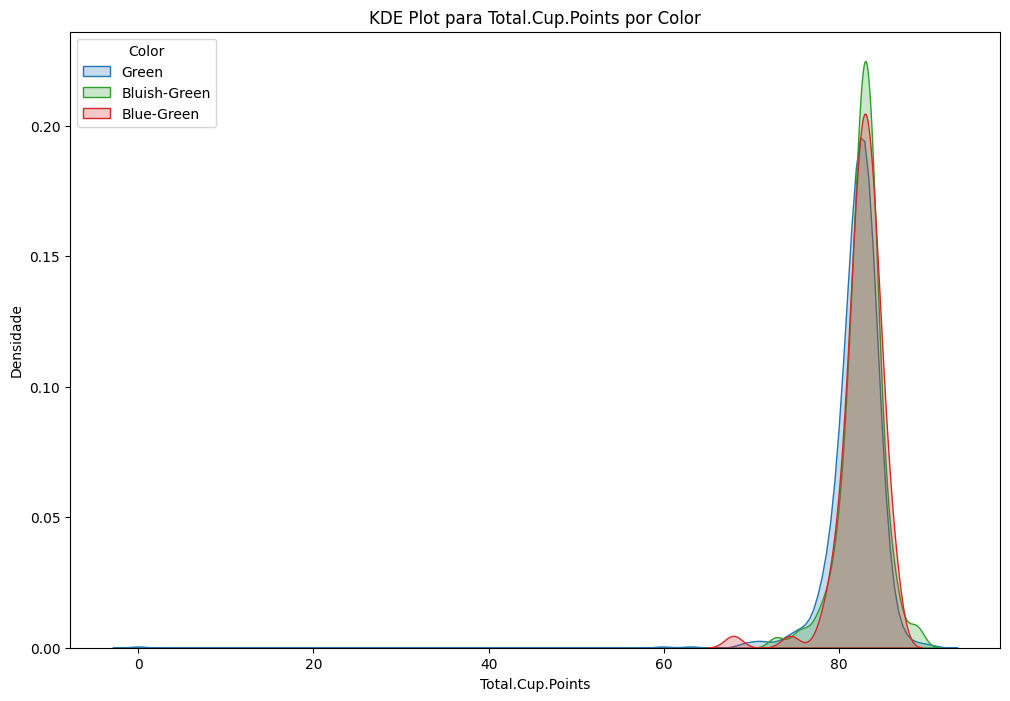

In [15]:
plt.figure(figsize=(12, 8))
for color in coffee_quality['Color'].unique():
    subset = coffee_quality[coffee_quality['Color'] == color]
    sns.kdeplot(subset['Total.Cup.Points'], label=color, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Color')
plt.legend(title='Color')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\3035555675.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality['Moisture'], shade=True)


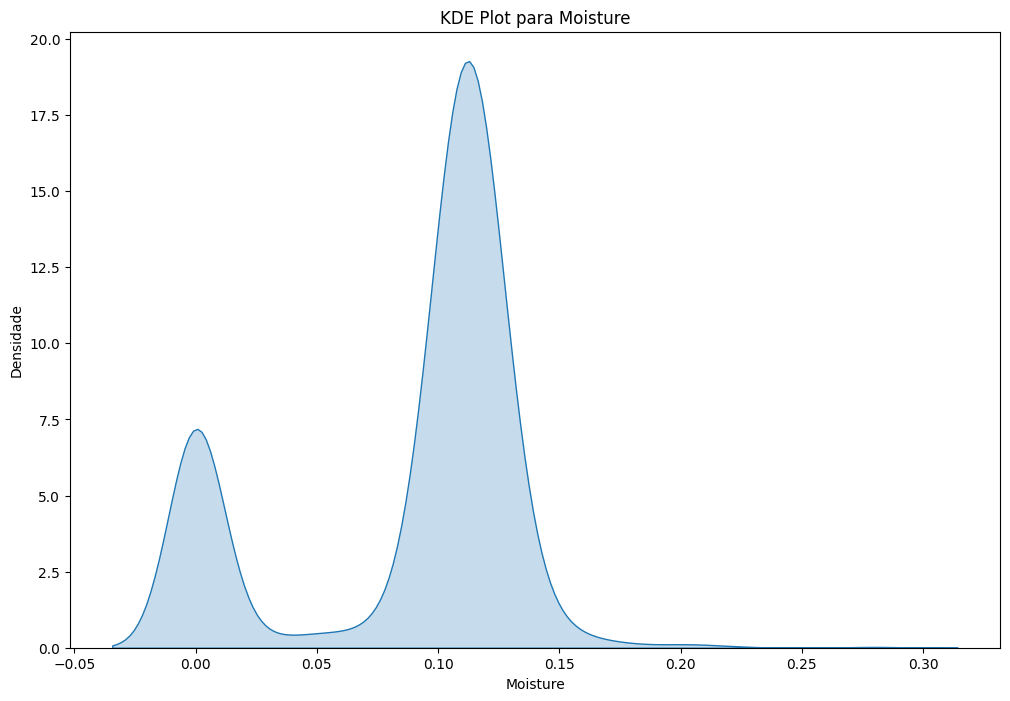

In [16]:
plt.figure(figsize=(12, 8))
sns.kdeplot(coffee_quality['Moisture'], shade=True)
plt.xlabel('Moisture')
plt.ylabel('Densidade')
plt.title('KDE Plot para Moisture')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\802957603.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`

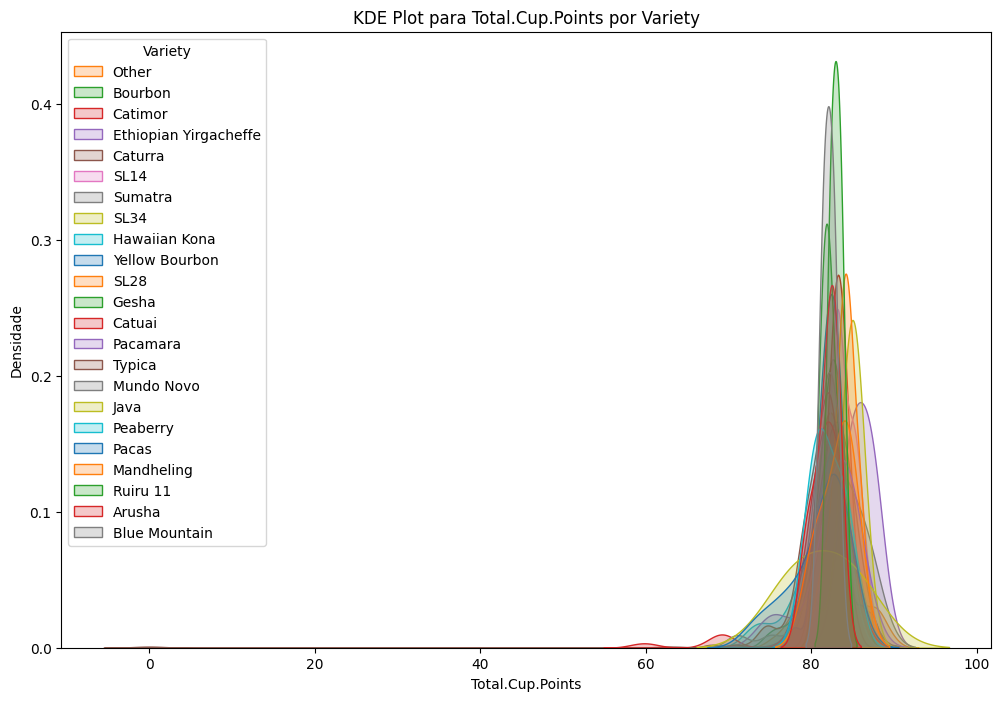

In [17]:
plt.figure(figsize=(12, 8))
for variety in coffee_quality['Variety'].unique():
    subset = coffee_quality[coffee_quality['Variety'] == variety]
    sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Variety')
plt.legend(title='Variety')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1553840962.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

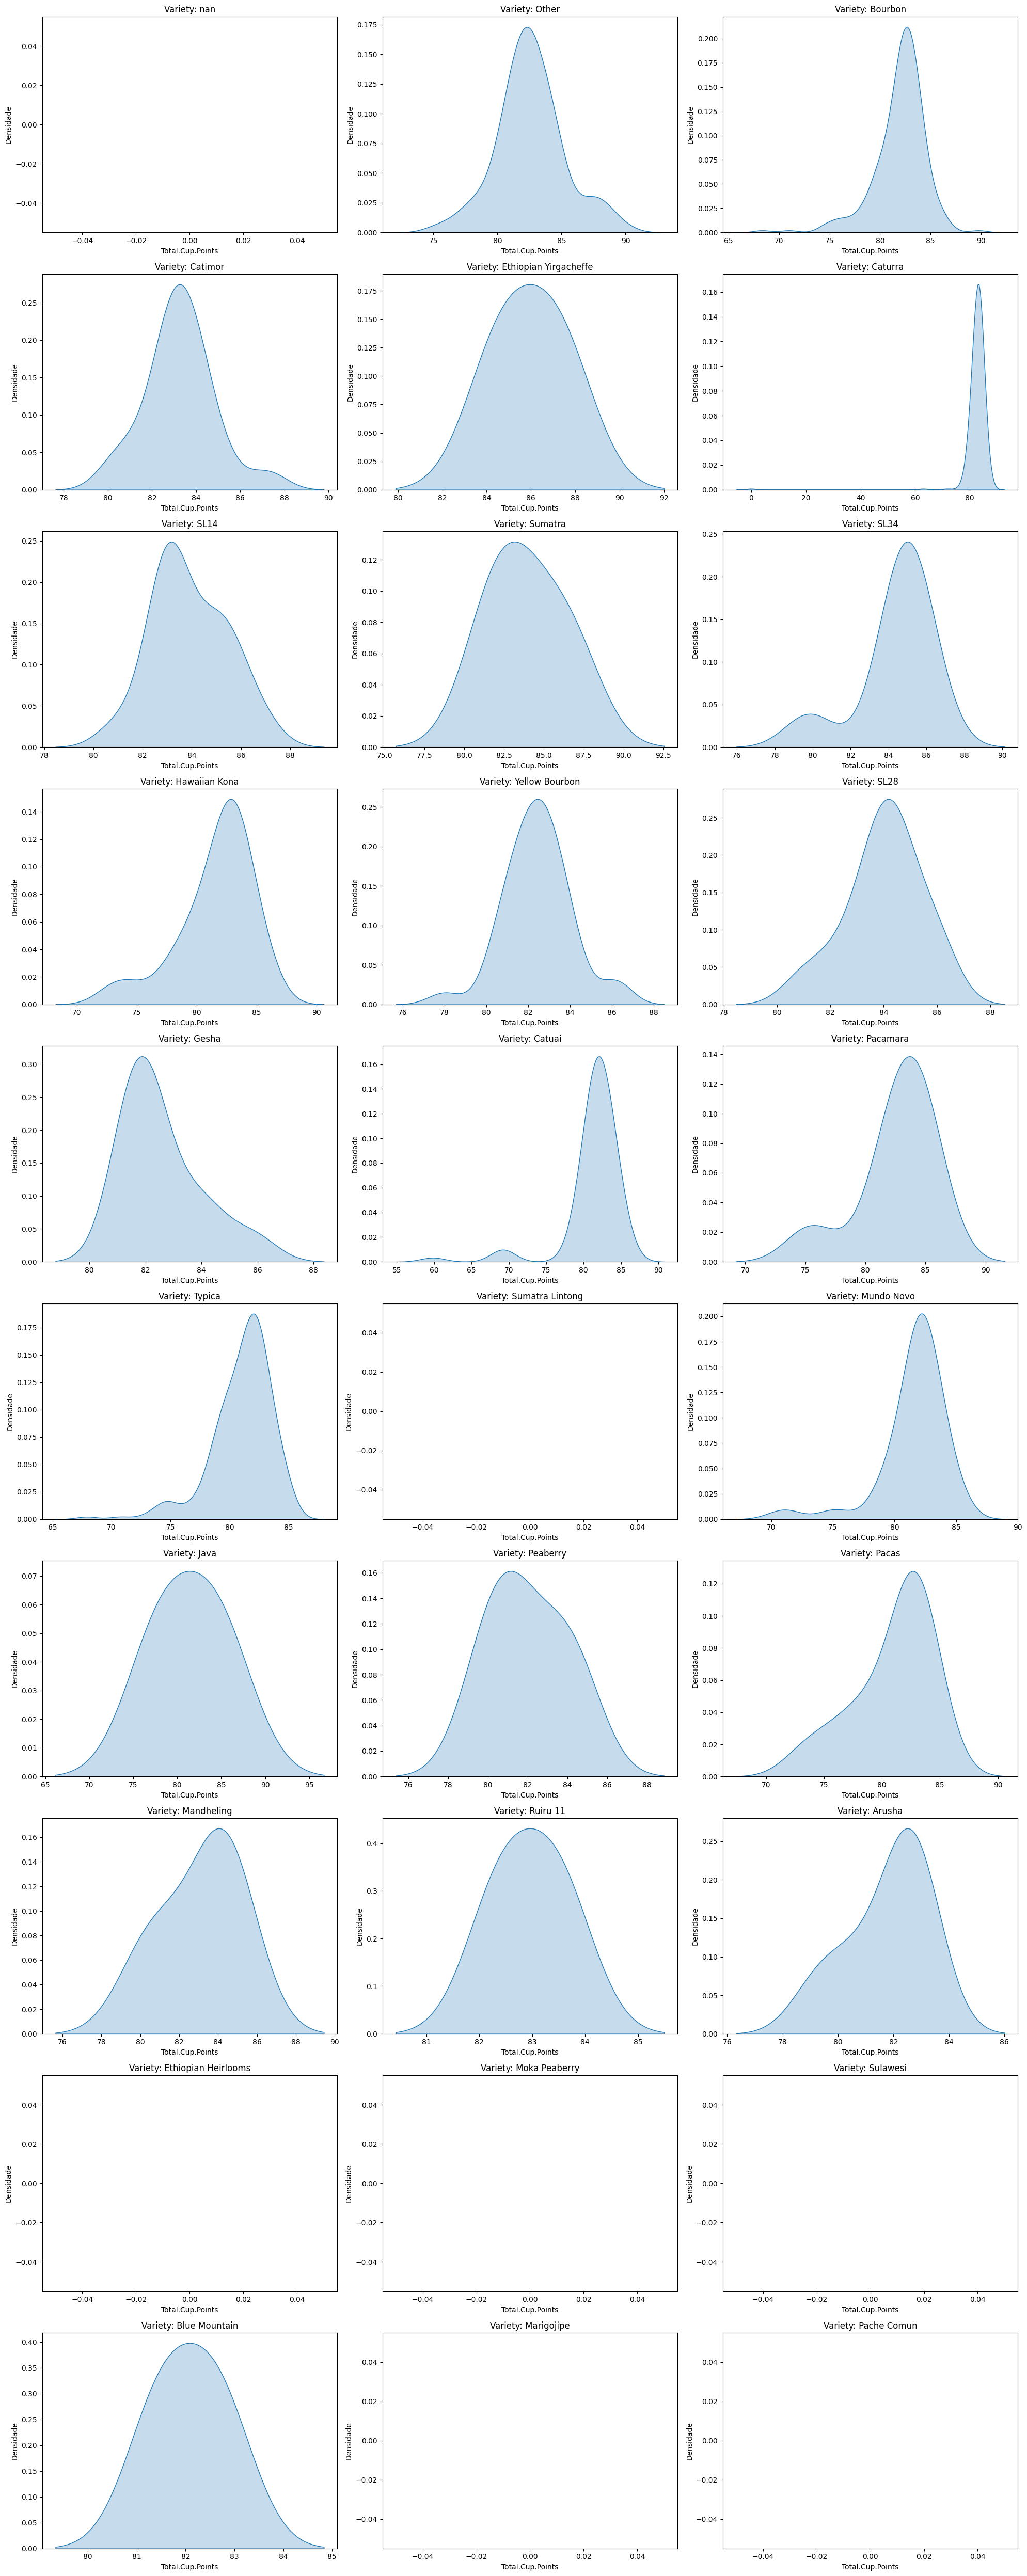

In [18]:

variety_list = coffee_quality['Variety'].unique()
num_varieties = len(variety_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_varieties + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, variety in enumerate(variety_list):
    subset = coffee_quality[coffee_quality['Variety'] == variety]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Variety: {variety}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\1419183000.py:4: FutureWarning: 

`shade` is now deprecated in favor of `f

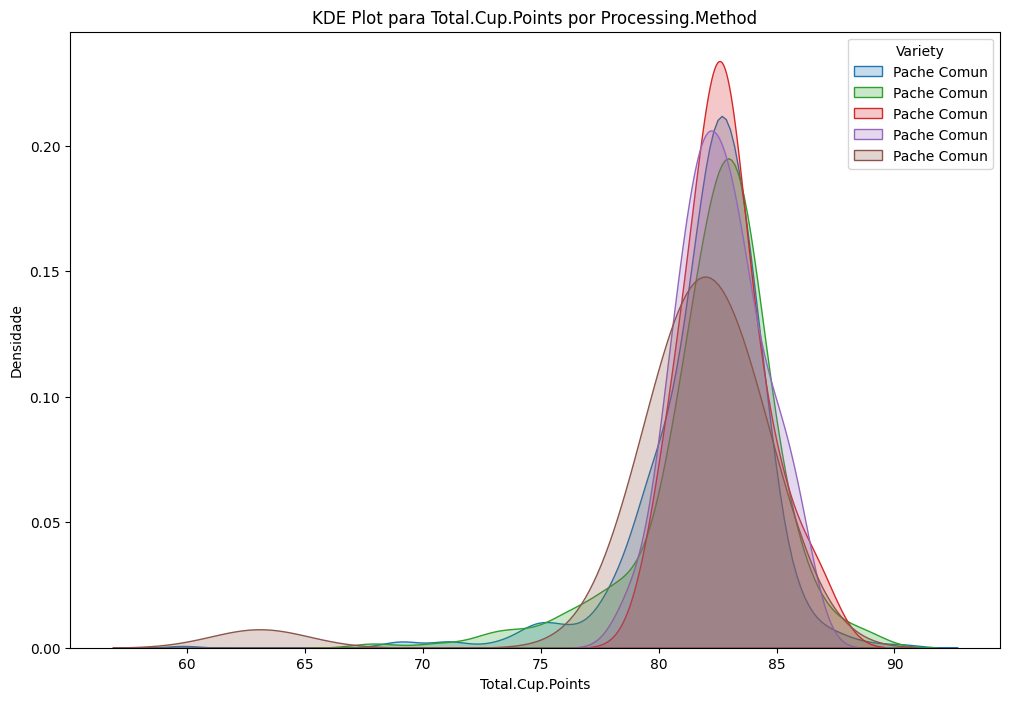

In [19]:
plt.figure(figsize=(12, 8))
for Processing_Method in coffee_quality['Processing.Method'].unique():
    subset = coffee_quality[coffee_quality['Processing.Method'] == Processing_Method]
    sns.kdeplot(subset['Total.Cup.Points'], label=variety, shade=True)
plt.xlabel('Total.Cup.Points')
plt.ylabel('Densidade')
plt.title('KDE Plot para Total.Cup.Points por Processing.Method')
plt.legend(title='Variety')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_31364\855980286.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; set

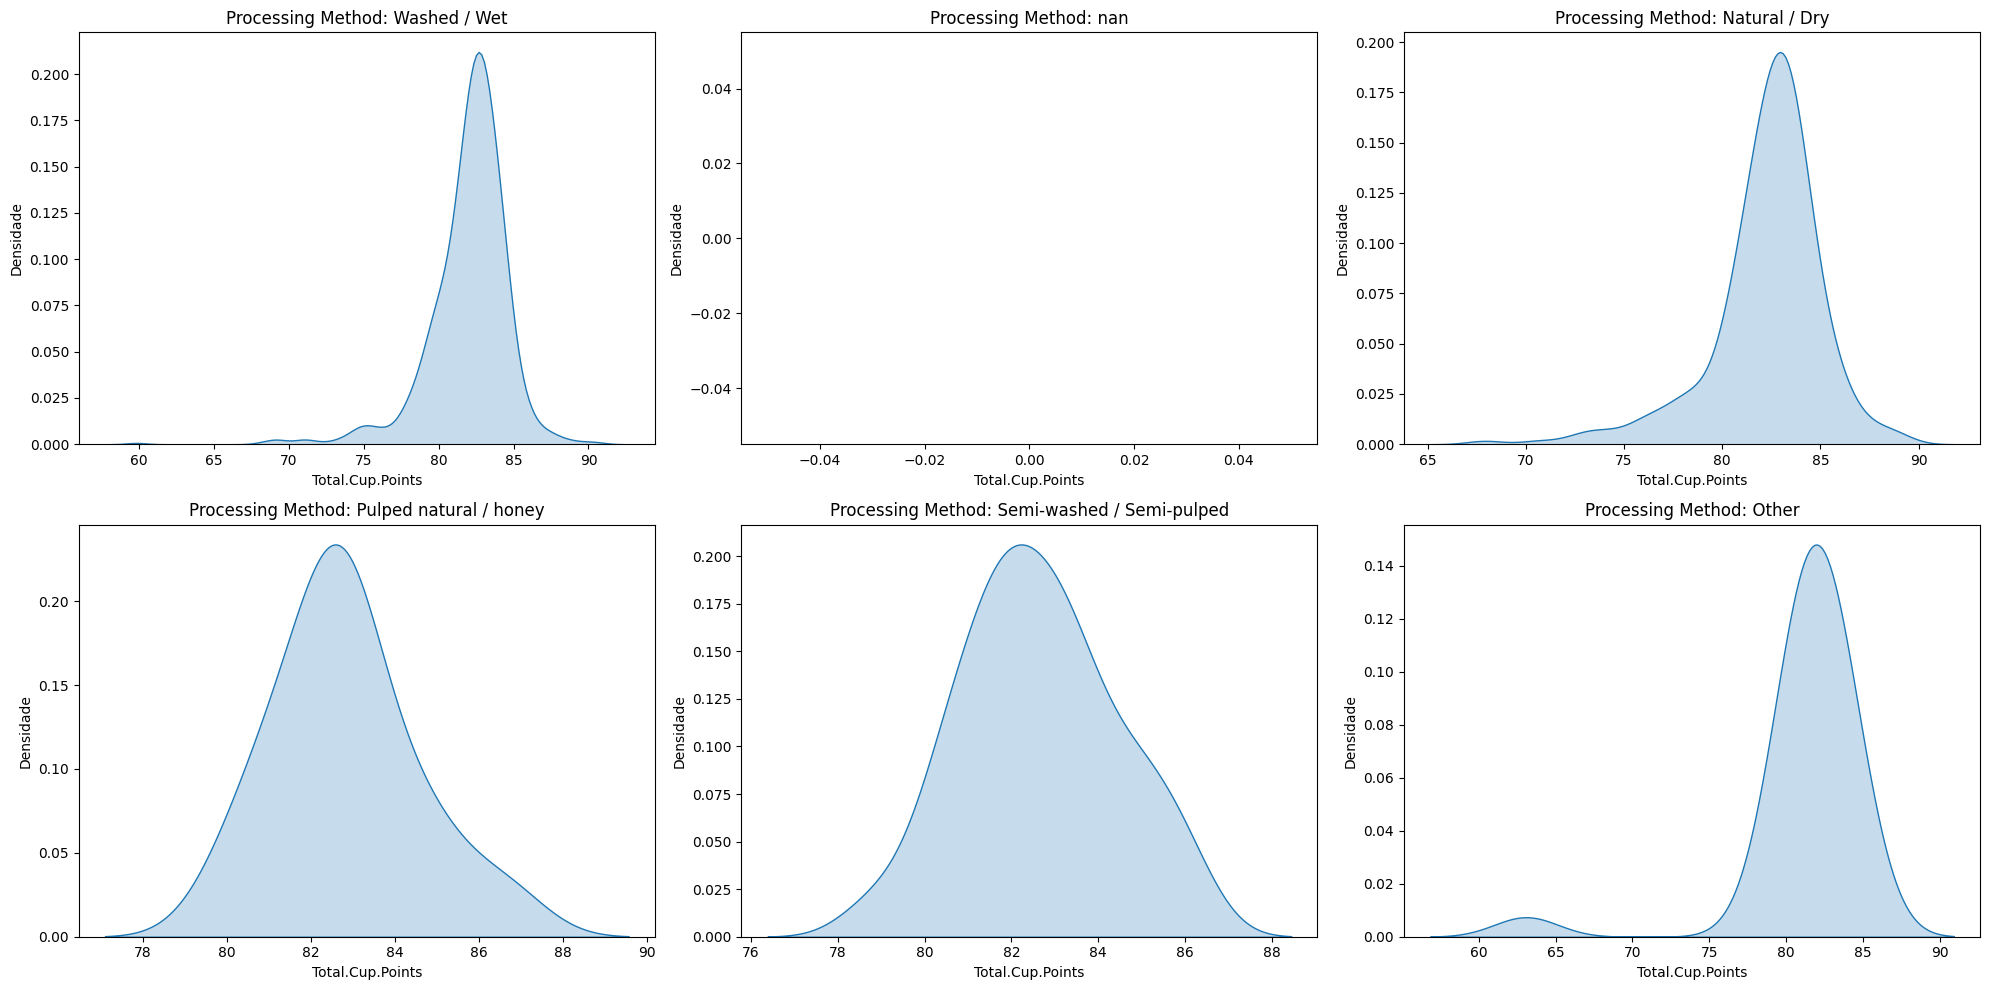

In [20]:
method_list = coffee_quality['Processing.Method'].unique()
num_methods = len(method_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_methods + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, method in enumerate(method_list):
    subset = coffee_quality[coffee_quality['Processing.Method'] == method]
    sns.kdeplot(subset['Total.Cup.Points'], shade=True, ax=axes[i])
    axes[i].set_title(f'Processing Method: {method}')
    axes[i].set_xlabel('Total.Cup.Points')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

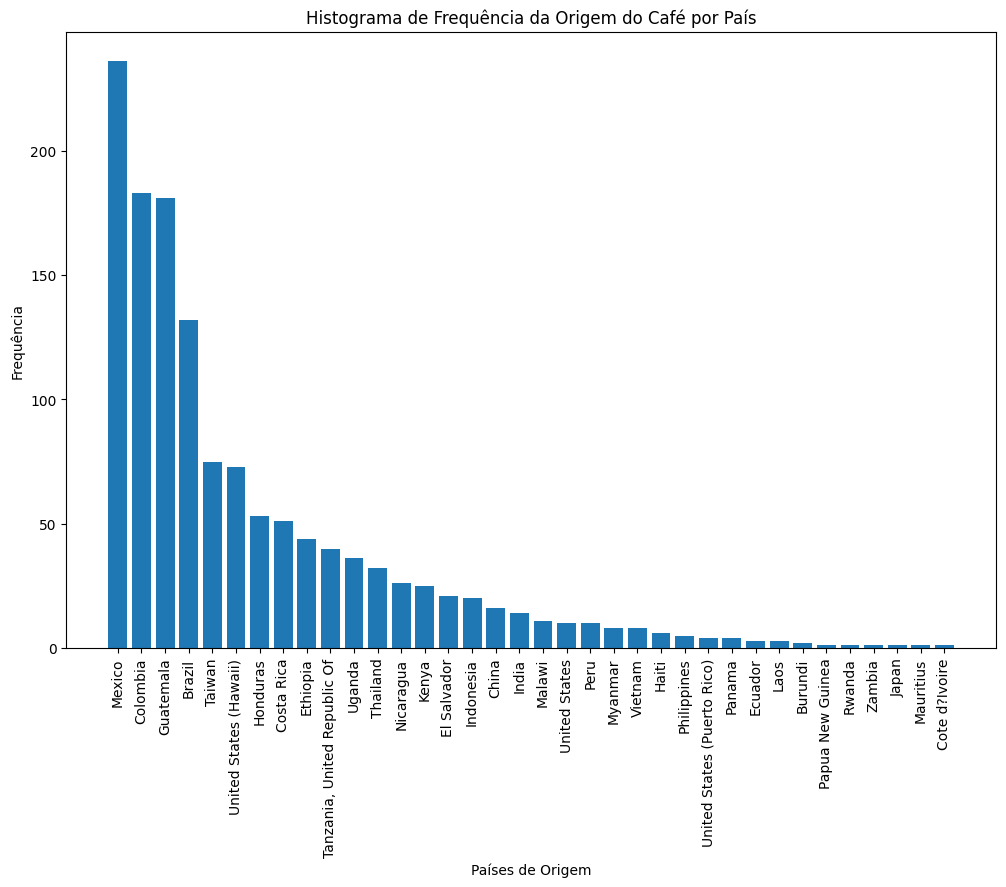

In [21]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show() 

In [22]:
countries = coffee_quality["Country.of.Origin"].unique()
new_section("Unique Countries")
print(len(countries))
print(countries)
sep()

================================ Unique Countries ================================
37
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States'
 'United States (Hawaii)' 'Indonesia' 'China' 'Costa Rica' 'Mexico'
 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua' 'Tanzania, United Republic Of'
 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea' 'El Salvador'
 'Japan' 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' 'Cote d?Ivoire' nan 'India']


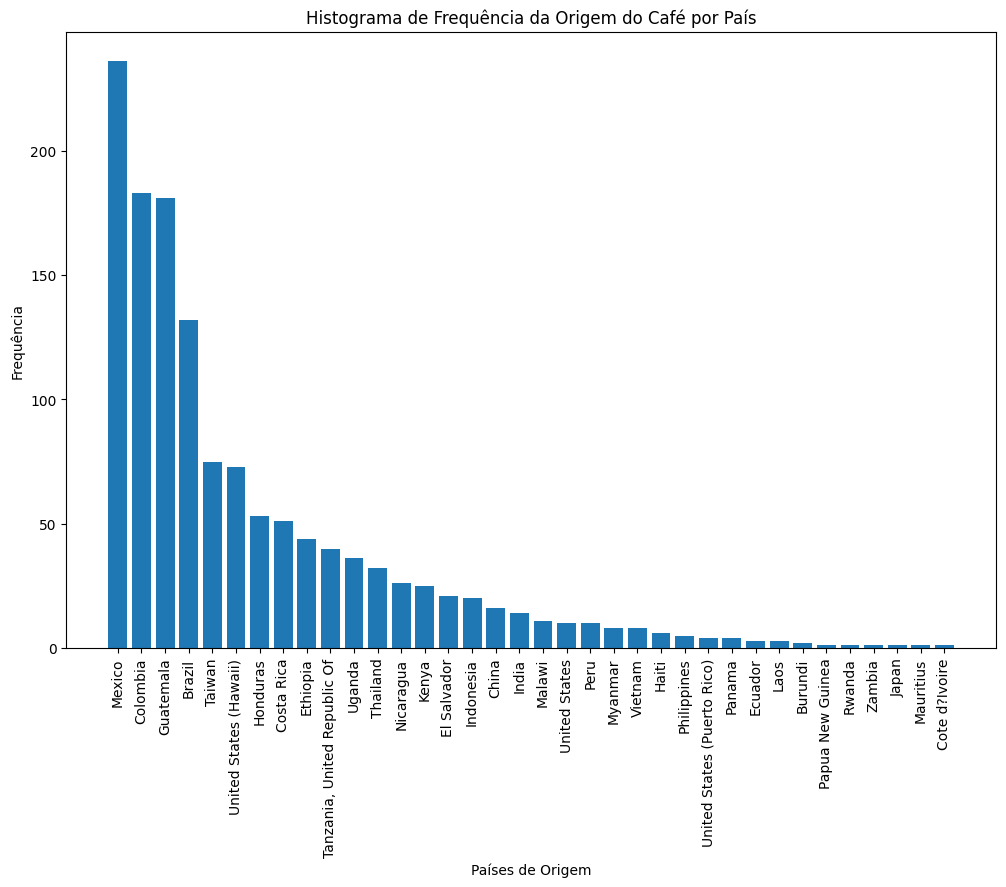

In [23]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show()  

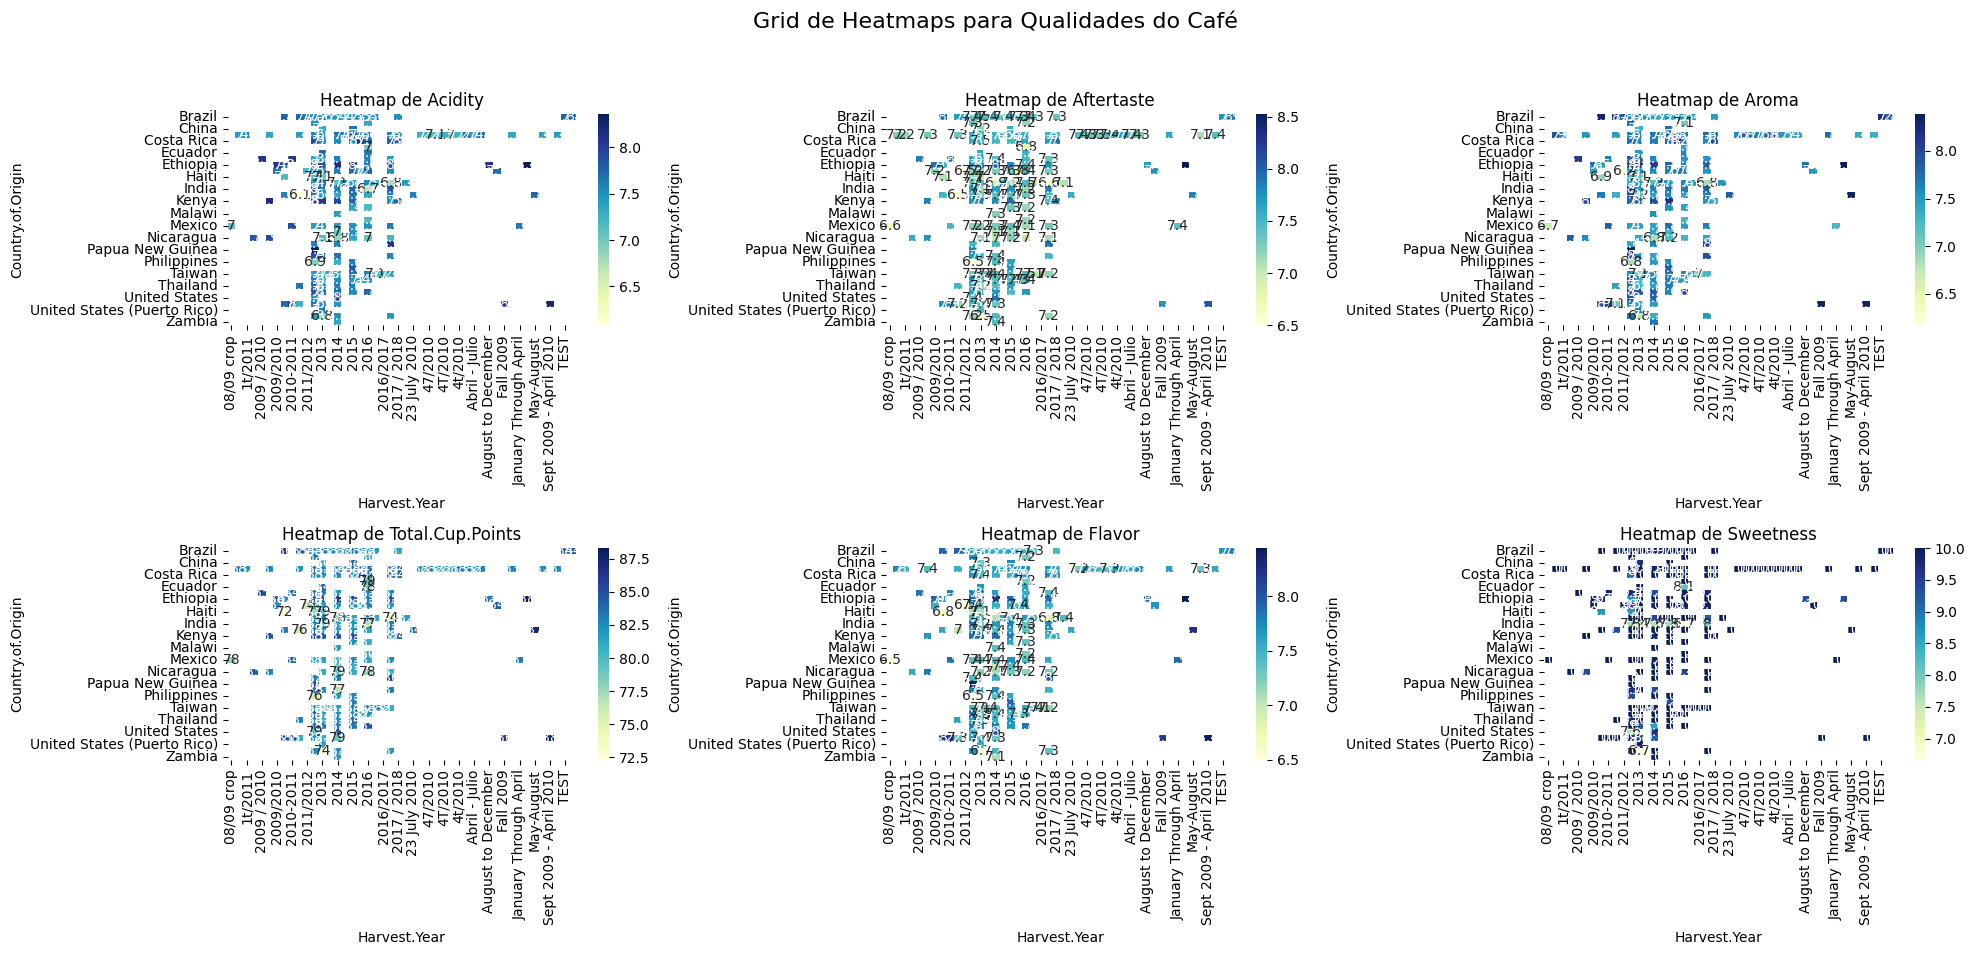

In [24]:
year_col = "Harvest.Year"
country_col = "Country.of.Origin"

attributes = ["Acidity", "Aftertaste", "Aroma", "Total.Cup.Points", "Flavor", "Sweetness"]

num_rows = 2 
num_cols = 3 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.suptitle("Grid de Heatmaps para Qualidades do Café", fontsize=16)

for i, attribute in enumerate(attributes):
    heatmap_data = coffee_quality.pivot_table(
        index=country_col, 
        columns=year_col, 
        values=attribute, 
        aggfunc="mean"
    )
    
    row = i // num_cols
    col = i % num_cols
    
    sns.heatmap(heatmap_data, ax=axes[row, col], cmap="YlGnBu", annot=True)
    axes[row, col].set_title(f"Heatmap de {attribute}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

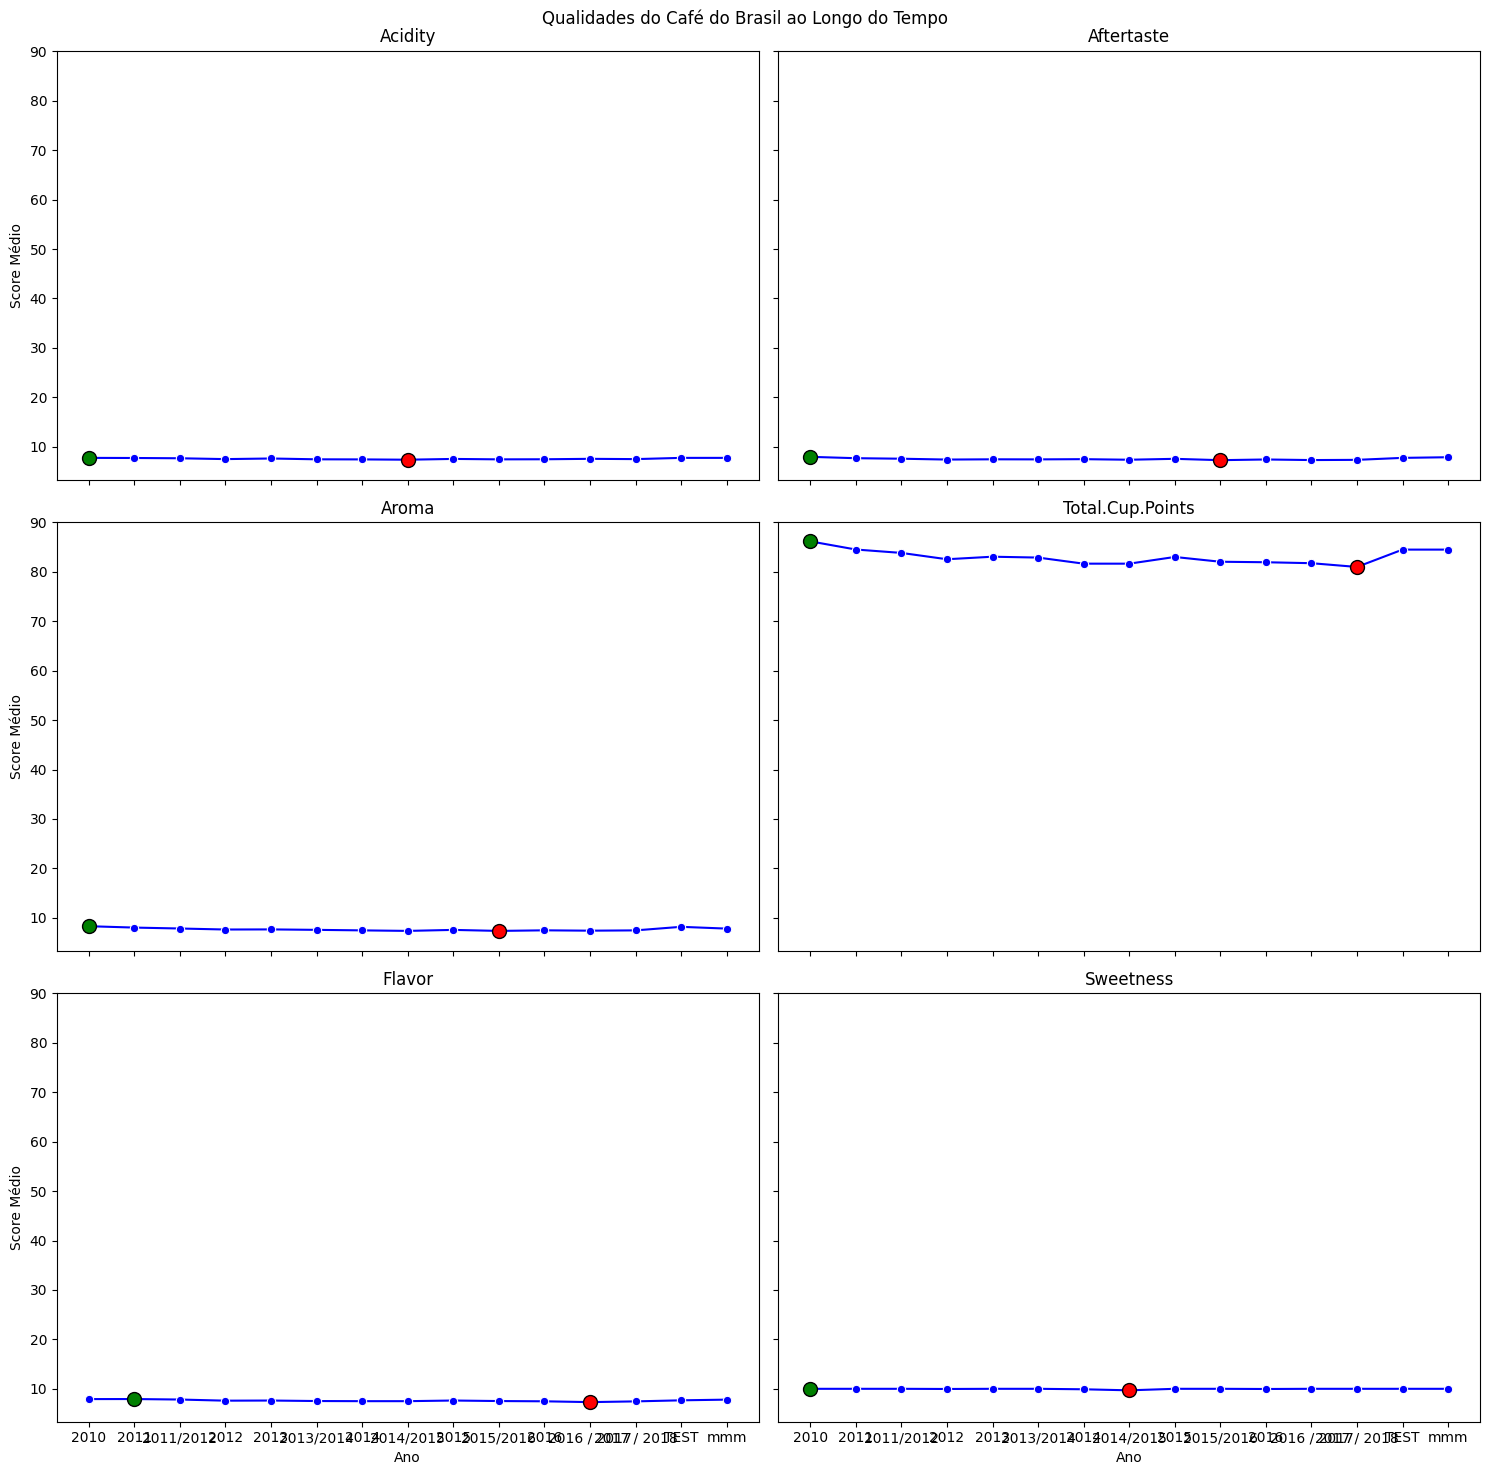

In [25]:
df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

attributes = ["Acidity", "Aftertaste", "Aroma", "Total.Cup.Points", "Flavor", "Sweetness"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Qualidades do Café do Brasil ao Longo do Tempo")

for i, attribute in enumerate(attributes):
    ax = axes[i//2, i%2]  

    group_data = df_brazil.groupby("Harvest.Year")[attribute].mean()

    max_year = group_data.idxmax()
    min_year = group_data.idxmin()
    max_score = group_data.max()
    min_score = group_data.min()

    sns.lineplot(ax=ax, x=group_data.index, y=group_data.values, marker="o", color="blue")

    ax.scatter(max_year, max_score, color="green", s=100, edgecolor="black", zorder=5)

    ax.scatter(min_year, min_score, color="red", s=100, edgecolor="black", zorder=5)

    ax.set_title(attribute)
    ax.set_xlabel("Ano")
    ax.set_ylabel("Score Médio")

plt.tight_layout()
plt.show()

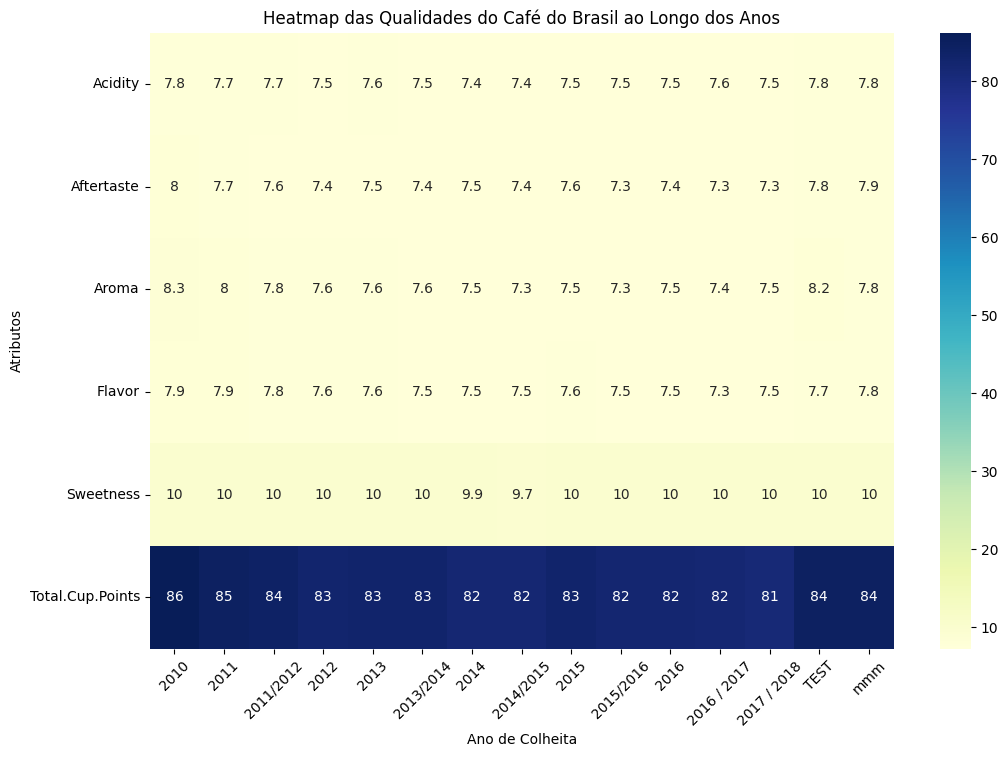

In [26]:
attributes = ["Acidity", "Aftertaste", "Aroma", "Total.Cup.Points", "Flavor", "Sweetness"]


df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

pivot_df = df_brazil.pivot_table(index="Harvest.Year", values=attributes, aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df.T, cmap="YlGnBu", annot=True)  
plt.title("Heatmap das Qualidades do Café do Brasil ao Longo dos Anos")
plt.xlabel("Ano de Colheita")
plt.ylabel("Atributos")
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.show()